# Lab Week 9

## EOSC 211

### Learning Objectives:

1. Debug code

(other possibilities):

2. use dictionary keys to reference complex datasets instead of RC indexing

3. work with purely functional code?

### Intro

[link to 9 debugging commandments](https://www.tygertec.com/9-rules-debugging/)

Are we going to use a formal debugger? 

or...

Pivot learning goals and use this week to talk about dictionaries?

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# get the datafile
the_file = np.genfromtxt("lab9_old/mgsva_MJJ.csv",delimiter=",")

# extract variables from the csv
lats = the_file[:,1]
lons = the_file[:,2]
u_vel = the_file[:,3]
v_vel = the_file[:,4]
u_dev = the_file[:,5]
v_dev = the_file[:,6]

# pack into a dictionary
data_dict = {"lats":lats, "lons":lons, "u_vel":u_vel, "v_vel":v_vel, "u_dev":u_dev, "v_dev":v_dev}

In [7]:
def move_to_grid(csv_data):
    """
    function to create 2D arrays out of FORTRAN formatted csv data
    
    in:
    csv file with columns 15000., lon, lat, u_vel, v_vel, u_dev, v_dev
    
    (dev is the standard deviation of each velocity measurement, 15000.
    is an artifact from FORTRAN formatting)
    
    out: 
    2D arrays: coords, u, v, udev, vdev
    """
    # set up grids
    # initializing with NaNs also automatically deals with points where there is
    # no data (eg. on land) because those locations will simply contain NaNs
    lon_0 = np.arange(-179,180)
    lat_0 = np.arange(-89, 89)

    u = np.full([179, 360], np.nan)
    v = np.full([179, 360], np.nan)

    # Loop through all points in .csv file.
    #
    # For each, calculate the row/col indices
    # from the lat/longs.  Lats get converted
    # into row indices 'i', and longs into column
    # indices 'j'. Since we have a 1 degree spacing
    # we just have to add the right offset
    # to make this work - for example, for latitudes
    # latitude of -89 goes to row 1,
    # latitude of -88 goes to row 2, etc.
    #
    # Then write the
    # corresponding U/V data for that lat/long
    # into the right place (i.e. index (i,j) )
    # in the U/V matrices 

    print(u.shape)
    for k in range(len(lats)-1):
        i = int(lons[k] + 78)  # row index
        j = int(lats[k] + 179)  # column index
        u[i,j] = u_vel[k]
        v[i,j] = v_vel[k]

(179, 360)


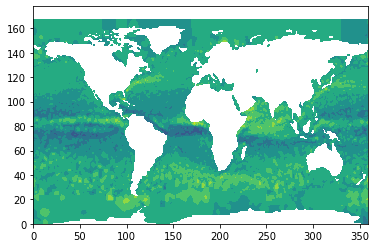

In [6]:
plt.contourf(u)

In [ ]:
lons

In [ ]:
# do it the pandas way
import pandas as pd

In [ ]:
currents = pd.read_csv("lab9_old/mgsva_MJJ.csv", names=["fortran_artifact", "lon", "lat", "U", "V", "stdev_U", "stdev_V"])
currents